# **Model Validation**
## 1] Model Capacity
  * import packages -> pandas DataFrame -> scatterplot
  1. 1차 함수, 2차 함수, 5차 함수, 9차 함수 모델 시각화
  2. 4개 모델 비교 시각화

## 2]. Training Error
  1.   1차 모델 Training Error
    *  X_train, y_train
    *  LinearRegression 모델 생성(행렬 계산을 통해 최적값의 연산식을 간단하게)
    * 모델 정보(학습 결과)확인
    * y_hat(예측값) 생성
    * MSE 계산

  2.   5차, 9차 모델 Training Error 생성
    * X 다항차수 변환(PolynomialFeatures) & X_train, y_train
    * 다항차수의 LinearRegression 모델 생성
    * 모델 정보(학습 결과)확인
    * y_hat(예측값) 생성
    * MSE 계산

  3. 3개 모델 Training Error값(MSE) 비교
  4. 잔차(Residual, 혹은 오차Error) 시각화 비교(with residplot)
    <p> ※ residplot? 선형회귀를 통해 각 데이터로부터 얻은 잔차값을 그래프로 그리는 기능

## 3] Testing Error
1.   Train_Data vs. Test_Data
  *  **DataFrame Split** (sklearn.train_test_split) - <U>Train_DF : Test_DF</U>(8:2) 
  *   **Array Split** (sklearn.train_test_split) - <U> X_train : X_test</U> **|** <U>y_train : y_test</U> (8:2)
  * Distribution Visualization(with scattorplot) - Train Data vs. Test Data


2.   1차, 5차, 9차 모델 Testing Error
    * Train_Data로 LinearRegression 모델 생성
    * Test_Data로 y_hat(예측값) 생성
    * Test_Data로 MSE 계산
3. 3개 모델 Testing Error 비교

## 4] Validation Approach
1.   **데이터분리** sklearn.train_test_split - <U>Train_Data : Validation_Data : Test_Data</U>(6:2:2)
2. 다항차수 모델 Validation Error
    * Train_Data로 모델 생성
    * Validation_Data로 y_hat(예측값) 생성 및 MSE 계산
    * 각각의 모델 Validation Error(MSE값) 비교
    * 최종 모델을 Test_Data에 적용(Test_Data로  y_hat(예측값) 생성 및 MSE 계산)










# **Model Validation**



## 1] Model Capacity

####   ⦁ Import packages
  *   <U>pandas</U> - 데이터 처리와 분석을 위한 라이브러리
  *   <U>pandas</U> - DataFrame. 엑셀과 같은 테이블 형태
  *   <U>matplotlib</U> - 그래프 라이브러리 (선 그래프, 히스토그램, 산점도 등)
  * <U>numpy</U> - 과학 계산, 다차원 **배열**, (선형대수연산, 푸리에 변환 같은 고소준 수학 함수와 유사난수 생성기 포함)
  * <U>seaborn</U> - 시각화하기 위한 가장 좋은 특징
  ---
  *  <U>sklearn</U> - 여러가지 머신러닝 알고리즘이 있는 라이브러리/데이터프레임으로 넣어야만 가능 **or** numpy array형태
  <p>series = ------------- 이렇게 768개 (series는 데이터프레임 형태X)
<p>sklearn은 x를 세로형태(=Data Frame)로 받아야.
<p> 그래서 np.array.reshape로 만들던가.
ex) array.reshape(-1,1)
<p> -1은 값이 어느정도인지 모를 때 사용. 가지고 있는 값의 형태로 전부 넣는. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ⦁pandas DataFrame - Electiric.csv

In [2]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


* 768행 9열 
* 내가 예측하고 싶은 것 = y값. 
* y와 **관련된** 데이터 = x값
* 관련된 열에 non-null 있는지 확인

In [7]:
type(Elec)

pandas.core.frame.DataFrame

In [9]:
type(Elec['surface_area'])

pandas.core.series.Series

### ⦁ pandas = DataFrame 형태로 호출
 ⦁ DataFrame에서 [ ] = Series 형태

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


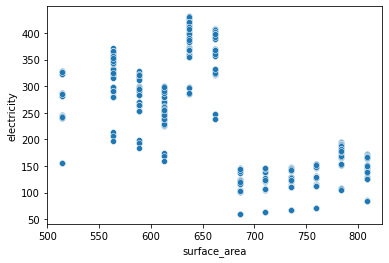

In [10]:
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()



### 1-.   1차 함수 모델 시각화(with sns.regplot)



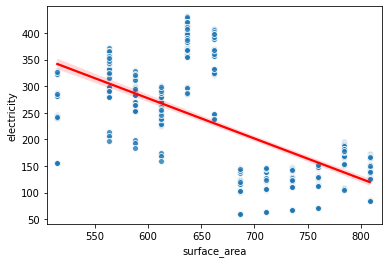

In [12]:
# regplot = regressionplot 예측plot
sns.regplot(x = 'surface_area', y='electricity', data=Elec,
            line_kws = {'color':'red'},
            scatter_kws = {'edgecolor':'white'}) # 동그라미(scatter)의 edge 색깔
plt.xlim(505, 820)            
plt.show()


### 1-.   2차 함수 모델 시각화



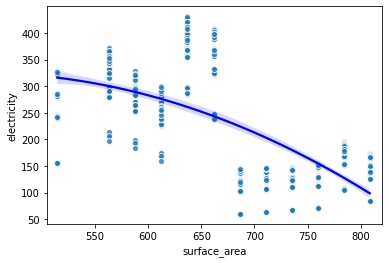

In [14]:
sns.regplot( x = 'surface_area', y='electricity', data=Elec,
            line_kws = {'color':'blue'},
            scatter_kws ={'edgecolor':'white'},
            order = 2)
plt.xlim(505, 820)
plt.show()

### 1-.   5차 함수 모델 시각화

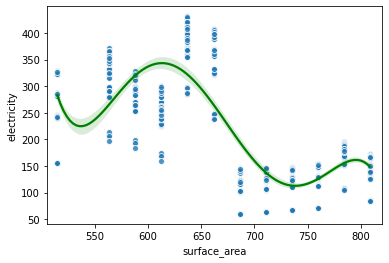

In [16]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws={'color':'green'},
            scatter_kws={'edgecolor':'white'},
            order = 5)
plt.xlim(505, 820)
plt.show()

### 1-.   9차 함수 모델 시각화

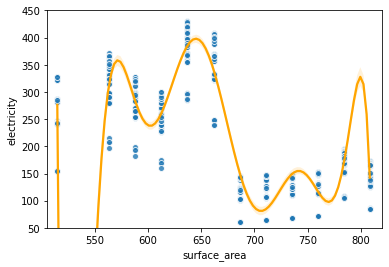

In [38]:
sns.regplot(x='surface_area', y='electricity', data=Elec,
            line_kws ={'color':'orange'},
            scatter_kws={'edgecolor':'white'},
            order=9)
plt.xlim(505,820)
plt.ylim(50, 450)
plt.show()

### 2-. 4개 모델 비교 시각화





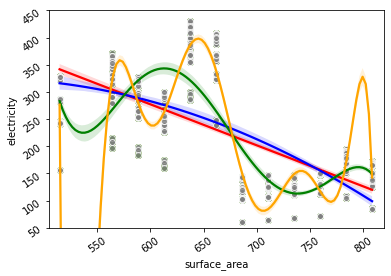

In [27]:
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'red'})
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'blue'}, order=2)
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'green'}, order=5)
sns.regplot(x='surface_area', y='electricity', data=Elec, line_kws={'color':'orange'}, order=9,
            scatter_kws={'color':'gray','edgecolor':'white'})
plt.xlim(505,820)
plt.ylim(50, 450)
plt.xticks(rotation = 35) # x축 적히는 값의 기울기
plt.yticks(rotation = 35)
plt.show()

In [39]:
# ipywudgets Package - (order = x로 두고)
def reg_plot(x):
  sns.regplot(x = 'surface_area', y='electricity', data=Elec,
            line_kws = {'color':'red'},
            order = x,
            scatter_kws = {'edgecolor':'white'}) # 동그라미(scatter)의 edge 색깔
  plt.xlim(505, 820)    
  #plt.ylim(50, 450)        
  plt.show()

⦁아래에서 11 order을 선택하면 'RankWarning: Polyfit may be poorly conditioned boot_dist' 경고가 뜨는데, <p>it means **'use a lower order!'**
<p>⦁Note that fitting polynomial <U>coefficients is</U> inherently badly conditioned when the degree of the polynomial is large or the interval of sample points is badly centered. The quality of the fit should always be checked in these cases. When polynomial fits are not satisfactory, splines may be a good alternative.

In [40]:
from ipywidgets import interact

order = [1,2,5,9,11,13]
interact(reg_plot, x = order)

interactive(children=(Dropdown(description='x', options=(1, 2, 5, 9, 11, 13), value=1), Output()), _dom_classe…

<function __main__.reg_plot>

## 2]. Training Error

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


###  1-.   1차 모델 Training Error





#### ⦁ X_train, y_train (DataFrame 형태로 with pd)

In [44]:
 X_train = Elec[['surface_area']]
 y_train = Elec['electricity']

 X_train.shape, y_train.shape

((768, 1), (768,))

In [47]:
# sklearn에는 DataFrame형태만
type(X_train)

pandas.core.frame.DataFrame

In [48]:
type(y_train)

pandas.core.series.Series

 #### ⦁  모델 생성 (with <U>sklearn</U>.LinearRegression() ) -> fit


*   책 - 선형모델 파트
*   LinearRegression 함수 - 기본적으로 1차함수 제공
* 데이터 x, y (X_train, y_train) 를 넣어 Model_1 (= LinearRegression())를 이용해 최적값 도출
* w,b를 뽑아내겠지 ( 1차니까 하나씩이겠지 )  -  기울기가 0인지점 ( 최적합 ) 으로


In [52]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### ⦁ 모델 정보(학습 결과=최적값)확인


*   coef = w값
*  intercept = b값
*   w가 음의 방향이니까 b의 값이 커짐




In [54]:
print(Model_1.coef_)
print(Model_1.intercept_)

[-0.75387157]
729.4538243006992


#### ⦁ y_hat(예측값) 생성


*   predict - 학습된 x값을 넣어서 예측값(y_hat)으로 뽑아내는 함수 
*  fit의 실제 y값과 predict의 y예측값(y_hat)은 다름
*  X_train 이 768개 input, 따라서 y_hat도 768개 output




In [55]:
y_hat_1 = Model_1.predict(X_train)
len(y_hat_1)

768

#### ⦁  MSE 계산(with np.mean)

In [56]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

5763.983779426347

### 2-.   5차 모델 Training Error 생성



#### ⦁ X 다항차수 변환(PolynomialFeatures) - PX_5 , y_train

* (768, 1) to (768, 5)
* x의 차수가 5개인 5차식
*  전체 6개 파라미터
  * w(coef) = 5개
  * b(intercept) = 1개










In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5 = poly.fit_transform(X_train) # x값을 기준으로 차수 변환

In [66]:
PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [67]:
X_train.shape, PX_5.shape

((768, 1), (768, 5))

#### ⦁ 5차 모델의 LinearRegression 모델 생성
* 5차식에 사용될 x(5개)와 y(1개)로 최적값 찾기

In [68]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### ⦁  모델 정보(학습 결과)확인

In [69]:
np.set_printoptions(suppress = True, precision = 10)

print(Model_5.coef_)
print(Model_5.intercept_)

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


#### ⦁  y_hat(예측값) 생성
* Model_5로 도출된 최적 함수에 x(5개)값을 넣어 y예측값

In [71]:
y_hat_5 = Model_5.predict(PX_5)
y_hat_5.shape

(768,)

#### ⦁ MSE 계산

In [72]:
TR_Err_5 = np.mean((y_train - y_hat_5) **2)
TR_Err_5

4177.726328606075

### 3-.  9차 모델 Training Error 생성

#### ⦁ X 다항차수 변환(PolynomialFeatures) & X_train, y_train






In [73]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9, include_bias=False)
PX_9 = poly.fit_transform(X_train)

In [74]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

#### ⦁ 다항차수의 LinearRegression 모델 생성

In [75]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### ⦁  모델 정보(학습 결과)확인

In [76]:
print(Model_9.coef_)
print(Model_9.intercept_)

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


#### ⦁  y_hat(예측값) 생성

In [77]:
y_hat_9 = Model_9.predict(PX_9)
y_hat_9.shape

(768,)

#### ⦁ MSE 계산

In [78]:
TR_Err_9 = np.mean((y_train - y_hat_9)**2)
TR_Err_9

4086.7199908150374

### 4-. 3개 모델 Training Error값(MSE) 비교

In [79]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  5763.983779426347
5차 모델 :  4177.726328606075
9차 모델 :  4086.7199908150374


### 5-. 잔차(Residual, 혹은 오차Error) 시각화 비교(with residplot)

#### ⦁ 1차 모델

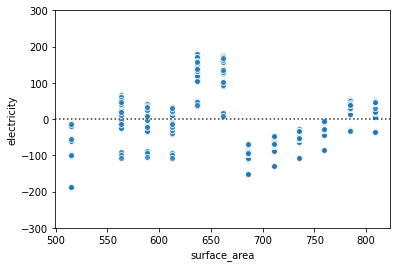

In [80]:
sns.residplot(x='surface_area', y='electricity',data=Elec,
              order = 1,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

#### ⦁ 5차 모델

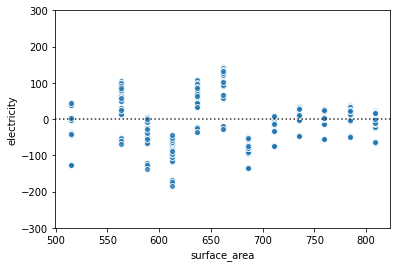

In [81]:
sns.residplot(x='surface_area', y='electricity',data=Elec,
              order = 5,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

#### ⦁ 9차 모델

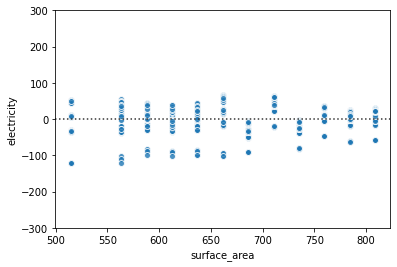

In [82]:
sns.residplot(x='surface_area', y='electricity',data=Elec,
              order = 9,
              scatter_kws={'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

## 3] Testing Error

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')

### 1-.   Train_Data vs. Test_Data

#### ⦁ DataFrame Split - <U>Train_DF : Test_DF</U>(8:2) 

In [86]:
from sklearn.model_selection import train_test_split

# test_size = 20% 데이터를 주는 , random split으로 쪼개짐 
# but, random_state값을 정해놓으면 랜덤X (실험 복원을 위해서도 똑같은 형태로 쪼개짐)
TR_Elec, TE_Elec = train_test_split(Elec, test_size=0.2, random_state = 2045)
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

In [87]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


In [88]:
TE_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


#### ⦁ Array Split - <U> X_train : X_test</U> **|** <U>y_train : y_test</U> (8:2)

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']], Elec[['electricity']],
                                                    test_size=0.2, random_state=2045)

In [91]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614,), (614, 1), (154,), (154, 1))

In [92]:
X_train.head()

555    686.0
355    637.0
200    588.0
669    808.5
561    735.0
Name: surface_area, dtype: float64

In [93]:
y_train.head()

,electricity
555,145.5
355,389.8
200,264.4
669,163.5
561,147.0


#### ⦁ Distribution Visualization - Train Data vs. Test Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


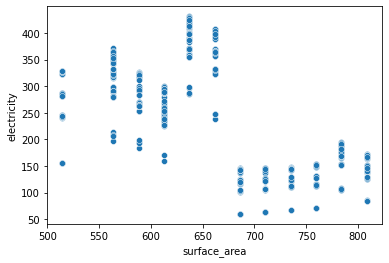

In [94]:
sns.scatterplot(TR_Elec['surface_area'],TR_Elec['electricity'])
plt.show()

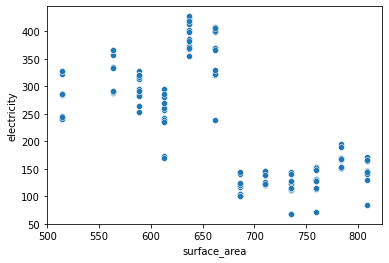

In [98]:
sns.scatterplot( x= TE_Elec['surface_area'],y= TE_Elec['electricity'])
plt.show()

In [106]:
type(X_train)

pandas.core.frame.DataFrame

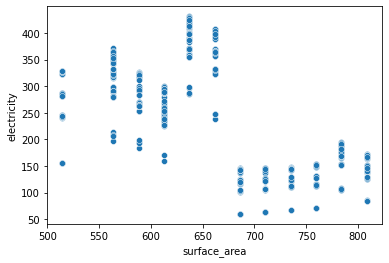

In [109]:
sns.scatterplot(x=X_train['surface_area'], y=y_train['electricity'])
plt.show()

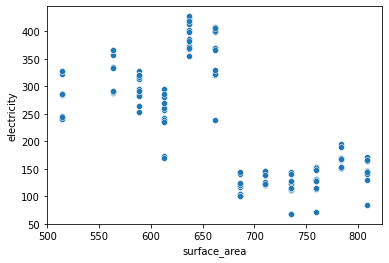

In [110]:
sns.scatterplot(x=X_test['surface_area'], y=y_test['electricity'])
plt.show()

### 2-. 1차 모델 Testing Error

####     ⦁ Train_Data로 LinearRegression 모델 생성


In [111]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####    ⦁ Test_Data로 y_hat(예측값) 생성


In [112]:
y_hat_1 = Model_1.predict(X_test)
y_hat_1.shape

(154, 1)

####    ⦁ Test_Data로 MSE 계산

In [114]:
TE_Err_1 = np.mean((y_test - y_hat_1)**2)
TE_Err_1

electricity    6044.176548
dtype: float64

In [115]:
from sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

### 2-. 5차 모델 Testing Error

####     ⦁ Train_Data로 LinearRegression 모델 생성


In [116]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
PX_5_TR = poly.fit_transform(X_train)

In [117]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####    ⦁ Test_Data로 y_hat(예측값) 생성


In [118]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

####    ⦁ Test_Data로 MSE 계산

In [119]:
TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4330.604566409499

### 2-. 9차 모델 Testing Error

####     ⦁ Train_Data로 LinearRegression 모델 생성


In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=9, include_bias=False)
PX_9_TR = poly.fit_transform(X_train)

In [122]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####    ⦁ Test_Data로 y_hat(예측값) 생성


In [123]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

####    ⦁ Test_Data로 MSE 계산

In [124]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.689067137633

### 2-. 3개 모델 Testing Error 비교

In [125]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4330.604566409499
9차 모델 :  4238.689067137633


## 4] Validation Approach

In [136]:
import pandas as pd

In [137]:
Elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


### 1-.   <U>Train</U> **vs.** <U>Validation</U> **vs.** <U>Test</U> ( 6 : 2 : 2 )

In [138]:
from sklearn.model_selection import train_test_split

#### ⦁ DataFrame Split - <U>Remain : Test</U>(8:2) 

In [139]:
X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']], Elec[['electricity']],
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state=2045)
print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615, 1)
(153, 1) (153, 1)


#### ⦁ DataFrame Split - Remain = <U>Train : Validation</U>(6:2) 

In [144]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain,
                                                                test_size = int(len(Elec)*0.2),
                                                                random_state = 2045)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462, 1)
(153, 1) (153, 1)
(153, 1) (153, 1)


### 2-.  5차 모델 Validation Error

In [141]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias=False)
PX_5_TR = poly.fit_transform(X_train)

####     ⦁ Train_Data로 모델 생성


In [142]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####     ⦁ Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [145]:
PX_5_VD = poly.fit_transform(X_valid)
y_hat_5 = Model_5.predict(PX_5_VD)

from sklearn.metrics import mean_squared_error

MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.4312593408395

### 3-.  9차 모델 Validation Error

In [146]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =9, include_bias=False)
PX_9_TR = poly.fit_transform(X_train)

####     ⦁ Train_Data로 모델 생성


In [147]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####     ⦁ Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [148]:
PX_9_VD = poly.fit_transform(X_valid)
y_hat_9 = Model_9.predict(PX_9_VD)

MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733124909912

###     4-. 2개 모델 Validation Error(MSE값) 비교


In [149]:
print('5차 모델 : ', MSE_5)
print('9차 모델 : ', MSE_9)

5차 모델 :  4136.4312593408395
9차 모델 :  3955.9733124909912


###  5-. 최종 모델을 Test_Data에 적용

#### ⦁Test_Data로  y_hat(예측값) 생성 및 MSE 계산

In [152]:
PX_9_TE = poly.fit_transform(X_test)

mean_squared_error(y_test, Model_9.predict(PX_9_TE))

4220.88573210769